### 0.导入函数库

In [1]:
%matplotlib inline
from obspy.core import read
from obspy.core import UTCDateTime
from obspy import read_inventory
from obspy.imaging.cm import pqlx
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

### 1.频谱计算

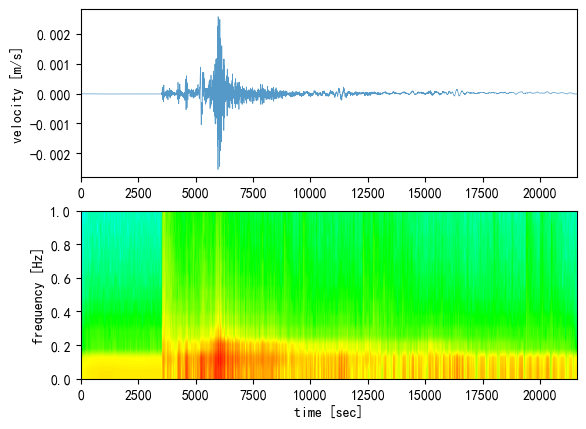

In [2]:
st = read("../data/spect_trace.mseed")
# 去仪器响应
inv = read_inventory("../data/GR.WET.xml")
st.remove_response(output="VEL", inventory=inv)
tr = st[0]
NFFT = 256     # 谱图窗长度
noverlap = 50  # 滑动窗口重叠点数量，必须小于NFFT
xstart = 0     # X轴起始点
xend = 21600   # 信号长度，单位为秒

# 绘图
ax1 = plt.subplot(211)
plt.plot(tr.times(), tr.data, linewidth=0.5, color="#5499C7")
plt.ylabel('velocity [m/s]')
# tr.plot(color="#5499C7",size=(630,300),linewidth=0.5)

plt.subplot(212, sharex=ax1)
# Pxx 瞬时功率的分段乘以频率数组
# freqs 频率向量
# bins 计算功率的时间区间的中心
# im matplotlib.image.AxesImage实例
Pxx, freqs, bins, im = plt.specgram(tr.data, NFFT=NFFT, Fs=tr.stats.sampling_rate, 
                                    noverlap=noverlap,cmap=pqlx)
plt.ylabel('frequency [Hz]')
plt.xlabel('time [sec]')
plt.ylim(0,1.0)
plt.xlim(xstart, xend)
plt.show()

(0.0, 1.0)

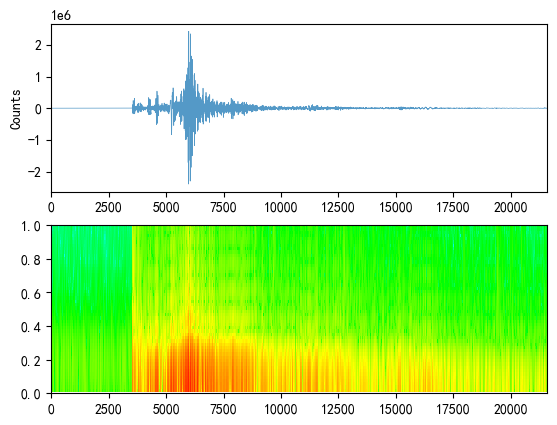

In [3]:
st = read("../data/spect_trace.mseed")
tr = st[0]

ax1 = plt.subplot(211)
plt.plot(tr.times(), tr.data, linewidth=0.5, color="#5499C7")
plt.ylabel('Counts')

ax2 = plt.subplot(212, sharex=ax1)
fig = tr.spectrogram(dbscale=True, cmap=pqlx, axes=ax2, show=False)
plt.ylim(0,1.0)

(0.0, 50.0)

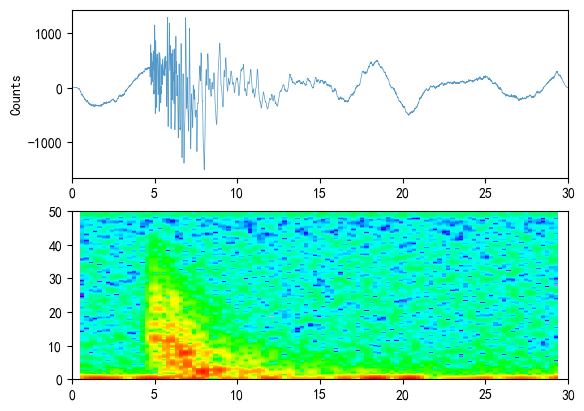

In [6]:
st = read("../data/test_trace.mseed")
tr = st[0]

ax1 = plt.subplot(211)
plt.plot(tr.times(), tr.data, linewidth=0.5, color="#5499C7")
plt.ylabel('Counts')

ax2 = plt.subplot(212, sharex=ax1)
fig = tr.spectrogram(per_lap=0.8, wlen=1, dbscale=True, axes=ax2, mult=10.0, cmap=pqlx)
plt.ylim(0,50)

### 2.数据滤波